# View the Spectrum model in prospector

In [1]:
import time, sys, os
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



import re
import h5py
import pandas as pd
%matplotlib inline

# re-defining plotting defaults
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'xtick.color': 'k'})
rcParams.update({'ytick.color': 'k'})
rcParams.update({'font.size': 30})

In [2]:
import matplotlib
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])

In [3]:
from astropy import constants as const
from astropy import units as u

In [4]:
import fsps

In [5]:
sps = fsps.StellarPopulation(zcontinuous=1)
ilib, slib, dlib = sps.libraries

In [6]:
sps.params['sfh'] = 4
sps.params['tau'] = 5.0
sps.params['logzsol'] = 0.0
sps.params['dust_type'] = 4  # kriek and Conroy (4)
sps.params['imf_type'] = 2  # kroupa
sps.params['imf3'] = 2.3
sps.params["dust2"] = 0.0

In [7]:
N = 10
dust = np.linspace(0,2,N)
color = cm.rainbow(np.linspace(0, 1, N))

In [8]:
#sps.get_spectrum?

In [9]:
list_wl = []
list_spec = []
for idx in range(N):
    sps.params["dust2"]  = dust[idx]
    wspec, spectr  = sps.get_spectrum(tage=13.7)
    wspec2 = sps.wavelengths
    list_wl.append(wspec)
    list_spec.append(spectr)
    

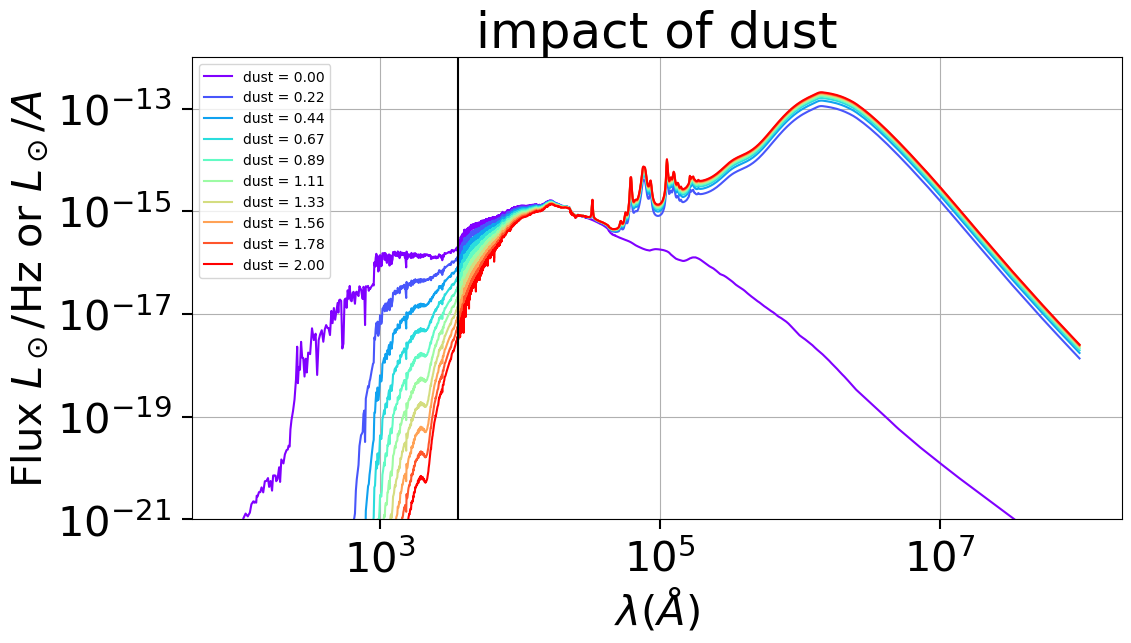

In [10]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.loglog(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-21,1e-12)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Flux $L_\odot/\mathrm{Hz}$ or $L_\odot/A$")
ax.set_title("impact of dust")
ax.axvline(3646,color='k')

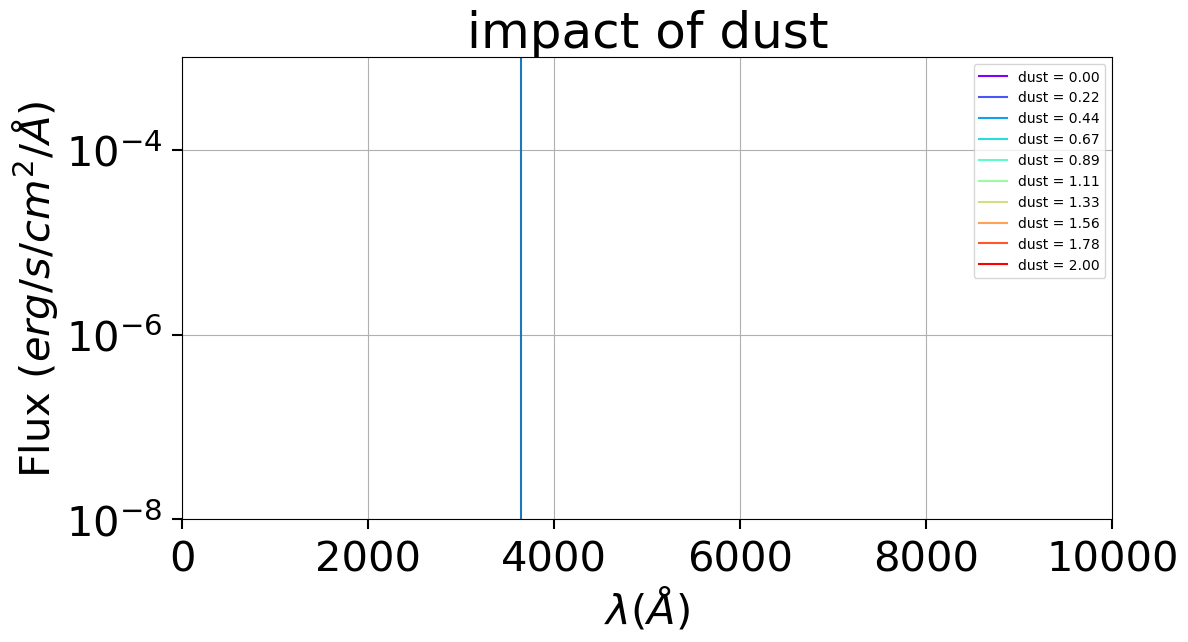

In [11]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.semilogy(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(0,10000)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Flux $(erg/s/cm^2/\AA)$")
ax.set_title("impact of dust")
ax.axvline(3646)

In [12]:
list_of_modelparams = []
list_wl = []
list_spec = []
for idx in range(N):
    new_model_params  = model_params 
    new_model_params["dust2"] = dust[idx]
    spectr, photom, mass_frac = sps.get_spectrum(outwave=None, filters=None, peraa=False,**new_model_params)
    wspec = sps.wavelengths
    list_wl.append(wspec)
    list_spec.append(spectr)
    list_of_modelparams.append(new_model_params)

NameError: name 'model_params' is not defined

In [ ]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.loglog(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-8,1e10)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Flux $(maggies)$")
ax.set_title("impact of dust")
ax.axvline(3646)

In [ ]:
fig = plt.figure(figsize = (12,6))
ax=fig.add_subplot(1,1,1)
for idx in range(N):
    val = dust[idx]
    label = f"dust = {val:.2f}"
    ax.semilogy(wspec,list_spec[idx],color=color[idx],label=label)

ax.grid()
ax.set_ylim(1e-8,1e10)
ax.set_xlim(0,10000)
ax.legend(fontsize=10)
ax.set_xlabel("$\lambda (\AA)$")
ax.set_ylabel("Flux $(maggies)$")
ax.set_title("impact of dust")
ax.axvline(3646)